# Proyecto: Métodos de Interpolación
### Análisis y Predicción de Datos Meteorológicos

Interpolacion (BREVE EXPLICACION)

Los datos sumisnistrados son de la ciudad __Basilea__, en Suiza de 2023; y fueron proporcionados por la pagina __meteoblue__: https://www.meteoblue.com/es/tiempo/archive/export se debe tener en cuenta que los datos se encuentran en un archivo __CSV__, por lo se debe instalar los paquetes necesarios para poder abrir el documento apropiadamente en JULIA.

In [ ]:
#INSTALACION DE PAQUETES
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("TaylorSeries")

Para acceder al archivo se importa el paquete __CSV__ y __DataFrames__ empleando la palabra '__using__' como se muestra en el codigo.

In [ ]:
#EJEMPLO PARA ABRIR Y LEER UN ARCHIVO   BORRARRRR
# Importar paquetes
using CSV
using DataFrames

# Leer el archivo CSV
archivo_csv = "data_Basilea.csv" #nombre del archivo
datos = CSV.read(archivo_csv, DataFrame) #lectura del archivo

# Mostrar las primeras filas del DataFrame
println("Datos Generales:") #datos generales del archivo
println(first(datos, 8)) #0-8 filas


In [ ]:
#EJEMPLO A SEGUIR PARA GRAFICAS   BORRARRRRRR
# Importar el paquete Plots
using Plots

# Lista de datos (temperaturas)
temperaturas = [20, 21, 19, 22, 23, 20, 21]

# Crear un vector de días (suponiendo que cada valor en la lista corresponde a un día)
dias = 1:length(temperaturas)

# Graficar los datos
plot(dias, temperaturas, label="Temperatura", xlabel="Días", ylabel="Temperatura (°C)", title="Temperaturas Diarias")

### Interpolación de Taylor

Informacion general en base a la teroria
* Se estable un rango de puntos conocidos, que permiten aproximar valores.
* Se construye un polinomio Pn(x) de grado menor o igual que n. (Polinomio de Taylor)

Para mayor informacion revisar el siguiente link: https://rua.ua.es/dspace/bitstream/10045/102428/1/tema2.pdf

__Aplicando teoria en julia__: <br>
Mediante los datos de entrada que serian los dias de una semana, se puede busca predecir un dia especifico, en este caso se tomara la primera semana del 2023 que va el del 1 al 7 de enero, y el dia que se desea predecir es el punto 1.2

__nota__: se podria elegir estos puntos mediante una funcion random que seleccionaria al azar una semana especifica del año, mediante el paquete 'Dates' el cual seria empleado en una funcion que te permita determinar el inicio y fin del año, para luego calcular las semanas del mismo; pero en este caso como se observa se establecieron los puntos previamente para un mejor manejo de información.
<br>

Se observa el grafico de los datos seleccionados:

Día 1: 12.61 C°
Día 2: 10.69 C°
Día 3: 6.59 C°
Día 4: 7.88 C°
Día 5: 10.27 C°
Día 6: 8.69 C°
Día 7: 7.76 C°


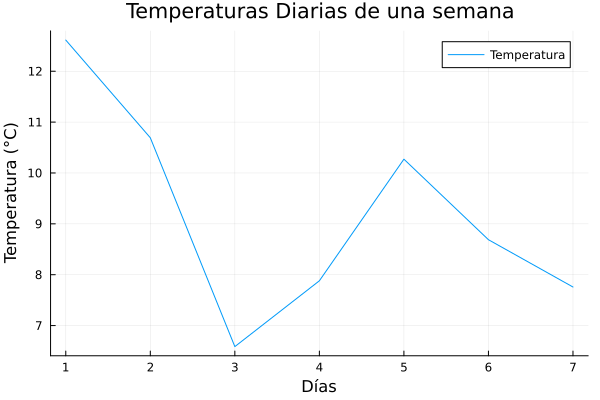

In [25]:
using CSV
using DataFrames

datos = CSV.read("data_Basilea.csv", DataFrame) #lectura del archivo
#promedio de puntos 
lista_promedio =[]
suma =0.0

for i in 10:16 #recorre 7 filas = 7ptos
    for j in 2:4 # recorre columnas
        cambio=parse.(Float64,datos[i, j])
        suma+=cambio
    end
    promedio = suma/ 3 #calcula promedio de temperatura baja, media y alta de un dia
    push!(lista_promedio, promedio) #agregrar en una lista
    suma=0.0 #limpia suma para pasar a la siguiente fila
end

#output dias seleccionados
for dia in 1:length(lista_promedio)
    println("Día ",dia,": ",round(lista_promedio[dia],digits=2)," C°")
end
#grafica de puntos seleccionados
plot(1:length(lista_promedio),lista_promedio, label="Temperatura", xlabel="Días", ylabel="Temperatura (°C)", title="Temperaturas Diarias de una semana")

Aplicando interpolacion de Taylor:

Punto a predecir 1.2: 7.11°C


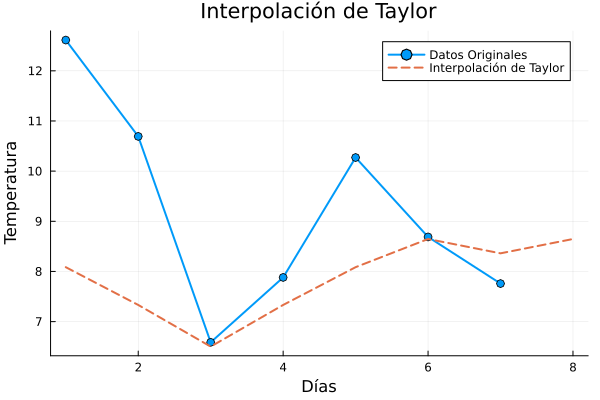

In [28]:
# Importar paquetes
using CSV
using DataFrames
using LinearAlgebra 
using Plots

# Leer el archivo CSV
datos = CSV.read("data_Basilea.csv", DataFrame) #lectura del archivo

# Promedio de puntos 
lista_promedio = []
suma = 0.0

for i in 10:16 # Recorre 7 filas = 7 puntos
    for j in 2:4 # Recorre columnas
        cambio = parse(Float64, datos[i, j])
        suma += cambio
    end
    promedio = suma / 3 # Calcula promedio de temperatura baja, media y alta de un día
    push!(lista_promedio, promedio) # Agrega el promedio a la lista
    suma = 0.0 # Limpia suma para pasar a la siguiente fila
end

# Función para calcular la derivada (diferencia finita)
function calculo_derivada(x)
    derivada = diff(x) # Calcula derivadas
    return derivada
end

# Calcular la serie de Taylor para sacar interpolación
function taylor_interpolacion(x, punto_a_predecir)
    # Calcular derivadas
    derivada_1 = calculo_derivada(x)
    derivada_2 = calculo_derivada(derivada_1) # Segunda derivada
    
    # Último valor conocido (base para la expansión de Taylor)
    ultimo_valor = x[end]

    # Predicción usando serie de Taylor, se toma en consideracion el punto a predecir
    prediccion = ultimo_valor
    if !isempty(derivada_1)
        prediccion += punto_a_predecir * derivada_1[end]  # Término de la primera derivada
    end
    if !isempty(derivada_2)
        prediccion += (punto_a_predecir^2 / 2) * derivada_2[end]  # Término de la segunda derivada
    end
    # Generar la serie de Taylor trigonométrica
    n_points = length(x):length(x)+7
    taylor_series = [ultimo_valor + derivada_1[end] * sin((i - length(x)) * π/4) + (derivada_2[end] / 2) * cos((i - length(x))^2 * π/4) for i in n_points]
    return prediccion,taylor_series
end

# Predicción para un punto en el futuro
punto_a_predecir = 1.2 
valor_prediccion,serie = taylor_interpolacion(lista_promedio, punto_a_predecir)

# Redondeo a dos decimales 
valor_prediccion = round(valor_prediccion, digits=2)

# Output
println("Punto a predecir ",punto_a_predecir,": ", valor_prediccion, "°C") 

# Gráfica incluyendo predicción
plot(1:length(lista_promedio), lista_promedio, lw=2, marker=:o, label="Puntos Seleccionados", xlabel="Días", ylabel="Temperatura (C°)", title="Interpolación de Taylor")
plot!(1:8, serie, lw=2, label="Interpolación de Taylor", linestyle=:dash)

### Interpolación de Lagrange

Valor interpolado en x = 1.2 es 13.46 C°


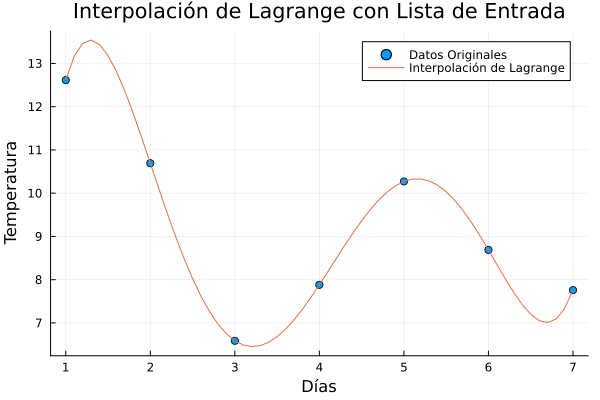

In [36]:
# Importar paquetes
using CSV
using DataFrames
using LinearAlgebra 
using Plots

# Leer el archivo CSV
datos = CSV.read("data_Basilea.csv", DataFrame) #lectura del archivo

# Promedio de puntos 
lista_promedio = []
suma = 0.0

for i in 10:16 # Recorre 7 filas = 7 puntos
    for j in 2:4 # Recorre columnas
        cambio = parse(Float64, datos[i, j])
        suma += cambio
    end
    promedio = suma / 3 # Calcula promedio de temperatura baja, media y alta de un día
    push!(lista_promedio, promedio) # Agrega el promedio a la lista
    suma = 0.0 # Limpia suma para pasar a la siguiente fila
end

function lagrange_interpolation(x, y, x0)
    n = length(x)
    result = 0.0
    for i in 1:n
        basis = 1.0
        for j in 1:n
            if i!= j
                basis *= (x0 - x[j]) / (x[i] - x[j])
            end
        end
        result += y[i] * basis
    end
    return result
end

x_values = 1:length(lista_promedio)  # Valores x
y_values = lista_promedio            # Valores y

x_range = minimum(x_values):0.1:maximum(x_values)  # Rango de valores x
y_range = lagrange_interpolation.(Ref(x_values), Ref(y_values), x_range)  # Interpolación de Lagrange para cada valor en el rango

x0 = 1.2  # Punto a interpolar
y0 = lagrange_interpolation(x_values, y_values, x0)  # Interpolación de Lagrange en el punto x0

println("Valor interpolado en x = ", x0, " es ", round(y0,digits=2)," C°")

# Graficar los datos originales y la interpolación de Lagrange
scatter(x_values, y_values, label="Puntos Seleccionados", xlabel="Días", ylabel="Temperatura (C°)", title="Interpolación de Lagrange")
plot!(x_range, y_range, label="Interpolación de Lagrange")

### Interpolación de Hermite

la interpolacion de Hermite es un metodo de interpolacion de puntos de datos como una funcion <br>
polinomica en el analisis numerico. El metodo consiste en calcular un polinomio de grado lo mas bajo <br>
posible que coincida con una funcion desconocida tanto en el valor observado como en el valor observado <br>
de sus priemras m derivadas.

__Formula:__ <br>

p(x) = f[wo] + f[wo,w1](x - wo) + f[wo,w1,w2](x - wo)(x-w1) + .... + f[w0,w1,w2,...,wn](x - wo)...(x - wn)  <br>

#### Pasos para hacer interpolacion de hermite: <br>

__paso 1__: obtener mi vector con las temperaturas de una ciudad en una semana <br>

temperaturas = [valor1, valor2, valor3, valor4, valor5, valor6, valor7] <br>

__paso 2__: obtener mi vector con los dias de la semana <br>

dias = [1,2,3,4,5,6,7] <br>

__paso 3__: obtener derivadas aproximadas <br>

f'(xi) = f(xi+1) - f(xi) / h <br>

donde: --> h = representa la diferencia de dias (en este caso la diferencia de dias es igual a 1)

__paso 4__: obtener la tabla de diferencias divididas <br>

f[x,xi] = f(xi) - f(x) / xi - x

antes de este paso ya debemos de tener definido los f(xi) y f'(xi) <br>

en este caso tenemos 7 puntos (repesentado por los dias de la semana) <br>

Datos Generales:

xo = 1 ------ f(x0) = 20 ------ f'(x0) = resultado de las derivadas aproximadas <br>
x1 = 2 ------ f(x1) = 19 ------ f'(x1) = resultado de las derivadas aproximadas <br>
x2 = 3 ------ f(x2) = 16 ------ f'(x2) = resultado de las derivadas aproximadas <br>
x3 = 4 ------ f(x3) = 22 ------ f'(x3) = resultado de las derivadas aproximadas <br>
x4 = 5 ------ f(x4) = 17 ------ f'(x4) = resultado de las derivadas aproximadas <br>
x5 = 6 ------ f(x5) = 24 ------ f'(x5) = resultado de las derivadas aproximadas <br>
x6 = 7 ------ f(x6) = 14 ------ f'(x6) = resultado de las derivadas aproximadas <br>

k = 14
n = 14 - 1 = 13 columnas de diferencias divididas

Datos a Conseguir:

wo  = 1 (x0) ------ f(w0)  = 20 ------ .... <br>
w1  = 1 (x0) ------ f(w1)  = 20 ------ .... <br>
w2  = 2 (x1) ------ f(w2)  = 19 ------ .... <br>
w3  = 2 (x1) ------ f(w3)  = 19 ------ .... <br>
w4  = 3 (x2) ------ f(w4)  = 16 ------ .... <br>
w5  = 3 (x2) ------ f(w5)  = 16 ------ .... <br>
w6  = 4 (x3) ------ f(w6)  = 22 ------ .... <br>
w7  = 4 (x3) ------ f(w7)  = 22 ------ .... <br>
w8  = 5 (x4) ------ f(w8)  = 17 ------ .... <br>
w9  = 5 (x4) ------ f(w9)  = 17 ------ .... <br>
w10 = 6 (x5) ------ f(w10) = 24 ------ .... <br>
w11 = 6 (x5) ------ f(w11) = 24 ------ .... <br>
w12 = 7 (x6) ------ f(w12) = 14 ------ .... <br>
w13 = 7 (x6) ------ f(w13) = 14 ------ .... <br>

__paso 5__: calculamos el polinomio de Hermite <br>

__paso 6__: Graficar los datos originales y luego el polinimo de hermite

### Interpolación de Polinomicas a Trozos